# Algoritmi nadgledanog ucenja

Masinsko ucenje je izucavanje kompjeterskih algoritama koji se sami poboljsavaju kroz steceno iskustvo. Ovakvo ucenje dio umjetne inteligencije. Algoritmi masinskog ucenja prave matematicki model na osnovu sample data (knonwnn as training data) kako bi mogli donositi odluke i predikcije a da ninsu izricito programirani da to urade. Kao sto smo naveli, algoritmi masinskog ucenja prave model, a taj proces nazivamo treniranje.

Neki od tipova ucenja su:

* Supervised learning (Nadgledano ucenje)
* Unsupervised learning (Nenadgledano ucenje)
* Semi-supervised learning (Polunadgledano ucenje)
* Reinforcment learning (Obucavanje pojacavanjem) 


U nastavku cemo posmatrati nadgledano ucenje i njegovim algoritmima.


Proces masinskog ucenja se sastoji od 5 koraka:
1. Prikupljanje i priprema podataka
2. Biranje modela
3. Treniranje modela
4. Procjena modela i prilagodjavanje parametara
5. Predikcija




Nadgledano ucenje je dio masinskog ucenja koje proucava funkcije koje preslikavaju ulaz na izlaz na osnovu primjera ulaza i izlaza parova. Izvodi funkciju iz obiljezenih podataka iz training seta. U nadgledanom ucenju svaki primjer je par koji se sastoji od ulaznog objekta (obicno vektora) i zeljene izlazne vrijednosti. Nadgledni algoritam ucenja analizira podatke o treningu i daje zakljucenu funkciju koja se moze koristiti za mapiranje novih primjera. Optimalan scenarij omoguciti ce da algoritam pravilno utvrdi oznake klase za nove instance.


## Linearna regresija

Linearna regresija je jedan od najlaksih algoritama u masinskom ucenju. To je statisticki model koji pokusava da pokaze odnos dvije relacije pomocu linearne jednacine.


Da bi lakse objasnili linearno regresiju uzeti cemo dole navedeni dataset kao primjer.

Importujemo:
* pandas - laksa manipulacija podacima
* NumPy - premade matematicke funkcije
* matploylib - crtanje grafika

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plot

Importujmo podatke sa [kaggle insurance dataset](https://www.kaggle.com/mirichoi0218/insurance/data)


Medical Cost Personal Datasets
Insurance Forecast by using Linear Regression


Sadrzi se od sljedecih kolona:
* age: age of primary beneficiary

* sex: insurance contractor gender, female, male

* bmi: Body mass index, providing an understanding of body, weights that are relatively high or low relative to height, objective index of body weight (kg / m ^ 2) using the ratio of height to weight, ideally 18.5 to 24.9

* children: Number of children covered by health insurance / Number of dependents

* smoker: Smoking

* region: the beneficiary's residential area in the US, northeast, southeast, southwest, northwest.

* charges: Individual medical costs billed by health insurance


Mi cemo filtrirati podatke jer bi inace dobili pravo nizak r (0.089405...), te cemo odbaciti 10% najvecih vrijednosti


In [2]:
data = pd.read_csv('insurance.csv')
data = data[data['smoker']=='no']
data = data[data['sex']=='male']
data = data[data['children']==0]
q = data["charges"].quantile(0.90)
data = data[data["charges"]< q]

Pogledajmo kako nam izgledaju podaci

In [3]:
print(data.shape)
data.head()

(200, 7)


,age,sex,bmi,children,smoker,region,charges
4,32,male,28.880,0,no,northwest,3866.85520
10,25,male,26.220,0,no,northeast,2721.32080
12,23,male,34.400,0,no,southwest,1826.84300
17,23,male,23.845,0,no,northeast,2395.17155
18,56,male,40.300,0,no,southwest,10602.38500


Uzeti cemo dvije varijable, godine nju nazivamo kao "nezavisnu" dok cemo pokusati da odredimo naplacenu sumu i nju nazivamo kao "zavisnu".
Kako bi ispitali koliko dobro nas model daje predikcije.

Koristiti cemo Ordinary Least Squares metodu.

![Eq](https://miro.medium.com/max/187/1*ypggCCmwRs4tjXqscH8N4Q.png)
![Vari](https://miro.medium.com/max/564/1*_wFBlqEDEzOp6Tx3suNj2g.png)

Za procjenu kvaliteta nase metode koristicemo coefficient of determination.

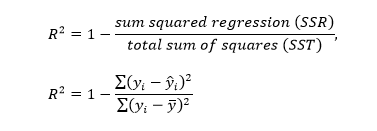


OLS metoda izgleda jednostavno i nije komoputacijski zahtjevna.

In [4]:
X = data['age'].values
Y = data['charges'].values

In [5]:
print(X.shape[0])
print(Y.shape[0])

200
200


In [6]:
mean_x = np.mean(X)
mean_y = np.mean(Y)

In [7]:
print(mean_x)
print(mean_y)

37.96
6131.75073575


In [8]:
n = X.shape[0]

In [9]:
numerator=0
denominator=0
for i in range(n):
    numerator+=(X[i] - mean_x ) * (Y[i] - mean_y)
    denominator+= (X[i] - mean_x) ** 2
m=numerator/denominator
b=mean_y-(m*mean_x)

print(m, b)

258.134726544 -3667.04348386


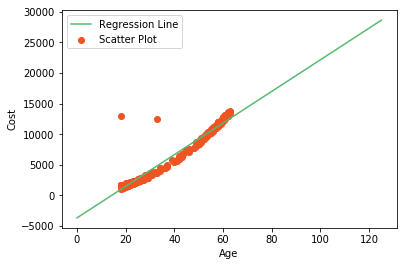

In [10]:
max_x = 125
min_x = 0

x = np.linspace(min_x, max_x)
y = m*x+b

plot.plot(x, y, color='#58b970', label='Regression Line')
plot.scatter(X, Y, c='#ef5423', label='Scatter Plot')

plot.xlabel('Age')
plot.ylabel('Cost')
plot.legend()
plot.show()

Izracunajmo sad koliko nam je dobar model koristeci coefficient of determination.

In [11]:
ss_t = 0
ss_r = 0
for i in range(n):
    y_pred = m*X[i]+b
    ss_t += (Y[i] - mean_y) ** 2
    ss_r += (Y[i] - y_pred) **2
r2 = 1 - (ss_r/ss_t)
print(r2)

0.929979307345


## KNN (k-nearest neighbors algorithm)



KNN k-nearest neighbors algorithm je algoritam koji mozemo koristiti i za klasifikaciju i regresiju. U oba slucaja input se sastoji od k najblizis susjeda iz training seta podataka. Dok output zavisis od toga da li ga koristimo za klasifikaciju ili regresiju. Jedan od korisnih tehnika jeste da dodjelimo tezisne vrijednosti za savkog od susjeda, tako da najblizi susjedi utjecu vise na klasifikaciju od onih daljih. 

Training set podataka su vektori, svaki sa labelom klase. Proces treniranja se sastoji samo od spasavanja training data vektora i klasa. Dok u fazi klasifikacije, k koristimo kao user defined konstatntu, i vektor bez labele klase. Njemu se dodjeljuje najcesca labela klase od njegovih k susjeda.

KNN algoritam mozemo podijeliti na 7 koraka:

1. Loadanje podataka
2. Inicijalizacija K kao broja najblizih susjeda
3. Za svaki primjer u podacima
    1. Izracunaj udaljenost izmedju susjeda i trenutnog primjera
    2. Dodaj sve distance za svakog susjeda u jedan array
4. Sortiraj dobijeni array od najblizeg do najdaljeg
5. Izaberi prvih K zapisa iz sortiranog arraya
6. Uzmi labele za izabrani K broj susjeda
7. Dva slucaja:
    1. Regresija
        Vrati mean 
    2. Klasifikacija
        Vrati mode  
        


     
    
Importujmo [keggle iris dataset](https://www.kaggle.com/arshid/iris-flower-dataset)

In [12]:
data = pd.read_csv('IRIS.csv')
print(data.shape)
data.head()

(150, 5)


,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa


U slucaju visedimenzionalnih podataka (10 i vise) cesto se provodi redukcija dimenzija zbog tzv. prokletstva dimenizjonalnosti. U slucaju k-NN to znaci da je euklidska distanca nam ne govori mnogo u visim dimenzijama zato sto svi vektori su skoro podjednako udaljeni od vektora cije susjede trazimo.


Napravimo training set tako sto uzmemo nasumicnih 75% zapisa (inace se uzima 66%) i 25% za testni set. 

In [13]:
data_copy = data.copy()
train_set= data_copy.sample(frac=0.75, random_state=0)
test_set=data_copy.drop(train_set.index)

In [14]:
print(train_set.shape)
train_set.head()


(112, 5)


,sepal_length,sepal_width,petal_length,petal_width,species
114,5.8,2.8,5.1,2.4,Iris-virginica
62,6.0,2.2,4.0,1.0,Iris-versicolor
33,5.5,4.2,1.4,0.2,Iris-setosa
107,7.3,2.9,6.3,1.8,Iris-virginica
7,5.0,3.4,1.5,0.2,Iris-setosa


In [15]:
print(test_set.shape)
test_set.head()

(38, 5)


,sepal_length,sepal_width,petal_length,petal_width,species
9,4.9,3.1,1.5,0.1,Iris-setosa
14,5.8,4.0,1.2,0.2,Iris-setosa
19,5.1,3.8,1.5,0.3,Iris-setosa
21,5.1,3.7,1.5,0.4,Iris-setosa
25,5.0,3.0,1.6,0.2,Iris-setosa


Definisimo funkcije za racunanje euklidske udaljenosti, najblizih susjeda, predvidjanje odgovora kao i racuanje tacnost odgovora

In [16]:
import math

def euclidieanDistance(inst1, inst2, length):
    distance=0
    for x in range(length):
        distance += pow ((inst1[x] -inst2[x]), 2)
    return math.sqrt(distance)

In [17]:
import operator
def getNeighbors(trainingSet, testInstance, k):
    distances=[]
    length=len(testInstance)-1
    for x in range(len(trainingSet)):
        dist = euclidieanDistance(testInstance, trainingSet[x], length)
        distances.append((trainingSet[x], dist))
    distances.sort(key=operator.itemgetter(1))
    neighbors = []
    for x in range(k):
        neighbors.append(distances[x][0])
    return neighbors

In [18]:
def getResponse(neighbors):
    classVotes = {}
    for x in range(len(neighbors)):
        response = neighbors[x][-1]
        if response in classVotes:
            classVotes[response] += 1
        else:
            classVotes[response] = 1
    sortedVotes = sorted(classVotes.items(), key=operator.itemgetter(1), reverse=True)
    return sortedVotes[0][0]

In [19]:
def getAccuracy(testSet, predictions):
    correct= 0
    for x in range(len(testSet)):
        if testSet[x][-1] is predictions[x]:
            correct +=1
    return(correct/float(len(testSet))) * 100.0

In [20]:
print("Train set length")
print(len(train_set))

print("Test set length")
print(len(test_set))

Train set length
112
Test set length
38


Implementacija samog algorima je poprilicno jednostavna

In [21]:
predictions=[]
kValue=3
for x in range(len(test_set)):
    neighbors = getNeighbors(train_set.values, test_set.values[x], kValue)
    result = getResponse(neighbors)
    predictions.append(result)
    print('---- precited=' +repr(result)+', actual=' + repr(test_set.values[x][-1]))
accuracy= getAccuracy(test_set.values, predictions)
print('Accuracy:' + repr(accuracy) + '%')

---- precited='Iris-setosa', actual='Iris-setosa'
---- precited='Iris-setosa', actual='Iris-setosa'
---- precited='Iris-setosa', actual='Iris-setosa'
---- precited='Iris-setosa', actual='Iris-setosa'
---- precited='Iris-setosa', actual='Iris-setosa'
---- precited='Iris-setosa', actual='Iris-setosa'
---- precited='Iris-setosa', actual='Iris-setosa'
---- precited='Iris-setosa', actual='Iris-setosa'
---- precited='Iris-setosa', actual='Iris-setosa'
---- precited='Iris-setosa', actual='Iris-setosa'
---- precited='Iris-setosa', actual='Iris-setosa'
---- precited='Iris-setosa', actual='Iris-setosa'
---- precited='Iris-versicolor', actual='Iris-versicolor'
---- precited='Iris-versicolor', actual='Iris-versicolor'
---- precited='Iris-versicolor', actual='Iris-versicolor'
---- precited='Iris-versicolor', actual='Iris-versicolor'
---- precited='Iris-virginica', actual='Iris-versicolor'
---- precited='Iris-virginica', actual='Iris-versicolor'
---- precited='Iris-versicolor', actual='Iris-versicol

## Naive bayes

Naivni Bayesovi klasifikatori su porodica jednostavnih probalistickih klasifikatora baziranih na primjeni Bayesove teoreme.

Bayesova teorema je jednostavna matematička formula koja se koristi za izračunavanje uslovnih verovatnoća.
teorema o uvjetnoj vjerojatnosti: vjerojatnost da se događaj A dogodi s obzirom da se drugi događaj B već dogodio jednaka je vjerojatnosti da se događaj B dogodi s obzirom da se A već dogodio pomnožen s vjerojatnošću nastanka događaja A i podijeljen s verovatnoća pojave događaja B

Primjene teorema su raširene i nisu ograničene na finansijsko područje. Kao primjer, Bayesova teorema može se koristiti za utvrđivanje tačnosti rezultata medicinskih ispitivanja uzimajući u obzir koliko je vjerovatno da će svaka osoba imati bolest i opću tačnost testa. Bayesova teorema oslanja se na uključivanje prethodnih raspodjela vjerojatnoće da bi se generirale posteriorne vjerovatnoće. Prethodna vjerojatnoća, u Bayesovom statističkom zaključku, je vjerojatnoća događaja prije nego što se prikupe novi podaci. Ovo je najbolja racionalna procjena vjerojatnoće ishoda na osnovu trenutnih saznanja prije nego što se eksperiment izvede. Posteriorna vjerovatnoća je revidirana vjerovatnoća nekog događaja koji se dogodio nakon uzimanja u obzir novih informacija. Posteriorna vjerojatnoća se izračunava ažuriranjem prethodne vjerovatnoće pomoću Bayesove teoreme. Statistički gledano, zadnja vjerojatnoća je vjerojatnoća događaja A koji se dogodio s obzirom na to da se dogodio događaj B.



Sada cemo uraditi implementaciju ovog algoritma: 

Importujmo [keggle indians  diabetes database](https://www.kaggle.com/uciml/pima-indians-diabetes-database)

In [22]:
data = pd.read_csv('diabetes.csv')
print(data.shape)
data.head()


(768, 9)


,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [23]:
data_copy = data.copy()
train_set= data_copy.sample(frac=0.80, random_state=0)
test_set=data_copy.drop(train_set.index)

In [24]:
print(train_set.shape)
train_set.head()


(614, 9)


,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
661,1,199,76,43,0,42.9,1.394,22,1
122,2,107,74,30,100,33.6,0.404,23,0
113,4,76,62,0,0,34.0,0.391,25,0
14,5,166,72,19,175,25.8,0.587,51,1
529,0,111,65,0,0,24.6,0.660,31,0


In [25]:
print(test_set.shape)
test_set.head()

(154, 9)


,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
9,8,125,96,0,0,0.0,0.232,54,1
11,10,168,74,0,0,38.0,0.537,34,1
19,1,115,70,30,96,34.6,0.529,32,1
23,9,119,80,35,0,29.0,0.263,29,1
28,13,145,82,19,110,22.2,0.245,57,0


In [26]:
def separateByClass(dataset):
    separated = {}
    for i in range(len(dataset)):
        vector = dataset[i]
        if (vector[-1] not in separated):
            separated[vector[-1]] = []
        separated[vector[-1]].append(vector)
    return separated

In [27]:
def summarize(dataset):
    summaries =[(np.mean(attribute), np.std(attribute)) for attribute in zip(*dataset)]
    del summaries[-1]
    return summaries

def summarizeByClass(dataset):
    separated = separateByClass(dataset)
    summaries = {}
    for classValue, instances in separated.items():
        summaries[classValue] = summarize(instances)
    return summaries


In [28]:
def calculateProbability(x, mean, stdev):
    exponent = math.exp(-(math.pow(x-mean,2)/(2*math.pow(stdev,2))))
    return (1/(math.sqrt(2*math.pi)*stdev))*exponent

In [29]:
def calculateClassProbabilities(summaries, inputVector):
    probabilities = {}
    for classValue, classSummaries in summaries.items():
        probabilities[classValue]=1
        for i in range(len(classSummaries)):
            mean, stdev = classSummaries[i]
            x = inputVector[i]
            probabilities[classValue] *= calculateProbability(x, mean, stdev)
        return probabilities

In [30]:
def predict(summaries, inputVector):
    probabilities = calculateClassProbabilities(summaries, inputVector)
    bestLabel, bestProb = None, -1
    for classvalue, probability in probabilities.items():
        if bestLabel is None or probability > bestProb:
            bestProb = probability
            bestLabel = classvalue
    return bestLabel

In [31]:
def getPredictions(summaries, testSet):
    predictions= []
    for i in range(len(testSet)):
        result = predict(summaries, testSet[i])
        predictions.append(result)
    return predictions

def getAccuracy(testSet, predictions):
    correct=0
    for x in range(len(testSet)):
        if testSet[x][-1] == predictions[x]:
            correct += 1
    return(correct/float(len(testSet)))*100.0

In [32]:
summaries = summarizeByClass(train_set.values)
predictions= getPredictions(summaries, test_set.values)
accuracy = getAccuracy(test_set.values, predictions)

print('Accuracy:' + repr(accuracy) + '%')

Accuracy:31.818181818181817%
